In [1]:
# This code generates long term, outer and inner trend lines

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stock_name_list = ['ROKU']
df = yf.download("ROKU", '2019-07-06', '2020-08-20')
df.to_excel('output.xlsx')
df = pd.read_excel('output.xlsx')
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-08,97.739998,104.000000,97.309998,103.250000,103.250000,12268300
1,2019-07-09,102.669998,104.440002,100.620003,103.400002,103.400002,10727300
2,2019-07-10,104.279999,105.889999,102.089996,103.500000,103.500000,8519300
3,2019-07-11,103.900002,104.900002,101.559998,104.540001,104.540001,9091800
4,2019-07-12,104.220001,105.455002,102.120003,102.470001,102.470001,7524200
...,...,...,...,...,...,...,...
279,2020-08-13,148.619003,152.005005,146.809998,149.970001,149.970001,5544700
280,2020-08-14,150.850006,152.500000,146.199997,146.850006,146.850006,3855000
281,2020-08-17,147.770004,148.270004,143.360001,145.710007,145.710007,4907400
282,2020-08-18,147.300003,152.190002,146.509995,149.850006,149.850006,5945800


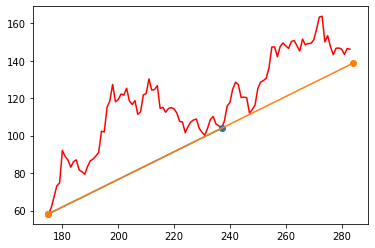

In [5]:
min_ = np.min(df["Low"])
idx_min = np.argmin(df["Low"])
new_df = df["Low"][np.argmin(df["Low"]):]
index = np.arange(np.size(new_df)+1)[1:]
index = np.reshape(index, (np.size(index), -1))
numerator = (new_df - min_)
numerator = numerator.values
numerator = np.reshape(numerator, (np.size(numerator), -1))
ans = numerator/index
slope = np.arctan(ans)
np.argmin(slope[1:])
idx_min_slope = np.argmin(slope[1:])
minimum_slope = np.min(slope[1:])


# Note about the calculation done below :-
# Here minimum_slope value and value of printed line's slopw will be diffrerent because printed line
# is based on "df" data frame index and calculated slope is based on new_df index, So in order to extent
# the line we need to calculate the slope according to "df" data frame's index, in order to do that hrere
# as shown below I am calcu;ating slope value using x and y values given below and finally, 
# There calculated slope value "m" will be used to extend the trendline (line shown in the figure below)

# y = (m*x) + c

x = idx_min
x1 = (idx_min + idx_min_slope + 1)  # x value in order to calulate slope "m"
y = new_df.values[0]  # x value in order to calulate slope "m"
y1 = new_df.values[idx_min_slope+1]

c = y

Y = (y - y1)
X = x - x1

m = Y / X  #  y   =  mx  + c
           #  y1  =  mx1 + c
           # -    -    -
           # y-y1 =  m*(x-x1)
           # m = (y-y1)/(x-x1)
c = y - (m*x)  # from the above given illustration we can calculate the value of c using this equation (c = y - mx)
# print(m)

fig, ax = plt.subplots()
# ax.legend(loc=df[i])
ax.plot(df["Low"][idx_min:], color='r')

x1, y1 = [idx_min, (idx_min + idx_min_slope + 1)], [new_df.values[0], new_df.values[idx_min_slope+1]]
# x1, y1 = [idx_min,(idx_min + idx_min_slope + 1)], [new_df.values[0], (idx_min + idx_min_slope + 1)]
x2, y2 = [idx_min, np.size(df["Low"])], [new_df.values[0], (m*np.size(df["Low"]) + c)]

plt.plot(x1, y1, x2, y2, marker = 'o')

9
103.9400024414062
0
112.1100006103516


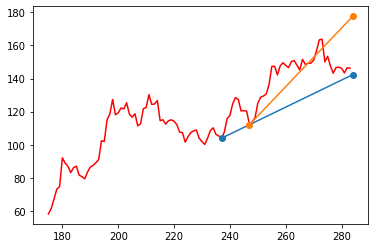

In [4]:
fig, ax = plt.subplots()
# ax.legend(loc=df[i])
ax.plot(df["Low"][idx_min:], color='r')

for _ in range(0,2):
    first_index = idx_min + idx_min_slope + 1
    new_df_ = new_df[idx_min_slope+1:]
    # print(new_df_)
    index_ = np.arange(np.size(new_df_)+1)[1:]
    index_ = np.reshape(index_, (np.size(index_), -1))
    # print(index_)
    numerator_ = (new_df_ - new_df_.values[0])
    numerator_ = numerator_.values
    numerator_ = np.reshape(numerator_, (np.size(numerator_), -1))
    ans_ = numerator_/index_
    slope_ = np.arctan(ans_)
    np.argmin(slope_[1:])
    idx_min_slope_ = np.argmin(slope_[1:])
    minimum_slope_ = np.min(slope_[1:])
    print(idx_min_slope_)
    print(new_df_.values[0])
    
    
    x = first_index
    x1 = (first_index + idx_min_slope_ + 1)  # x value in order to calulate slope "m"
    y = new_df_.values[0]  # x value in order to calulate slope "m"
    y1 = new_df_.values[idx_min_slope_+1]

    c = y

    Y = (y - y1)
    X = x - x1

    m = Y / X  #  y   =  mx  + c
               #  y1  =  mx1 + c
               # -    -    -
               # y-y1 =  m*(x-x1)
               # m = (y-y1)/(x-x1)
    c = y - (m*x)  # from the above given illustration we can calculate the value of c using this equation (c = y - mx)
    # print(m)
    
    
#     x1, y1 = [first_index, (first_index + idx_min_slope_ + 1)], [new_df_.values[0], new_df_.values[idx_min_slope_+1]]
    x2, y2 = [first_index, np.size(df["Low"])], [new_df_.values[0], (m*np.size(df["Low"]) + c)]
    
    
    plt.plot(x2, y2, marker = 'o')
    
    idx_min_slope = idx_min_slope + idx_min_slope_ + 1
    
# TODO: Have to add a slope condition which will decide the slope of outer and inner trend lines.
# condition to be used - the new trend line's slope should be greater than the previous trendline as shown in the figure below